In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("dirty_iris.csv")

In [4]:
complete=df.dropna().shape[0]
per = (complete/df.shape[0])*100
print("Complete observations : ",complete)
print("Percentage of completed observation : ",per,"%")

Complete observations :  96
Percentage of completed observation :  64.0 %


In [22]:
df2=pd.DataFrame()
def rules(df):
    invalid_species=df.index[(df['Species']!='setosa')&(df['Species']!='virginica')&(df['Species']!='versicolor')].tolist()
    col=df.columns
    inv=[]
    for i in range(0,3):
        inv.extend(df.index[df[col[i]]<0].tolist())
    invalid_petal=df.index[df["Petal.Length"]<2*df['Petal.Width']].tolist()
    invalid_sepal=df.index[df["Sepal.Length"]>30].tolist()
    invalid_sepal_length=df.index[df["Sepal.Length"]<df['Petal.Width']].tolist()
    invalids = pd.unique(invalid_species + inv +invalid_petal + invalid_sepal + invalid_sepal_length).tolist()
    rule1=len(invalid_species)
    rule2=len(inv)
    rule3=len(invalid_petal)
    rule4=len(invalid_sepal)
    rule5=len(invalid_sepal_length)
    return invalids,rule1,rule2,rule3,rule4,rule5

In [24]:
inv,r1,r2,r3,r4,r5 = rules(df)
df.iloc[inv]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.0,-3.0,3.500,1.0,versicolor
29,NaN,2.8,0.820,1.3,versicolor
78,5.1,3.8,0.000,0.2,setosa
85,5.1,3.8,1.900,inf,setosa
105,5.5,NaN,0.925,1.0,versicolor
27,73.0,29.0,63.000,NaN,virginica
124,49.0,30.0,14.000,2.0,setosa
42,0.0,NaN,1.300,0.4,setosa


In [37]:
print("Rules is broken ",r1+r2+r3+r4+r5," times")

Rules is broken  9  times


Text(0.5, 0, "['0=Rule1', '1=Rule2', '2=Rule3', '3=Rule4', '4=Rule5']")

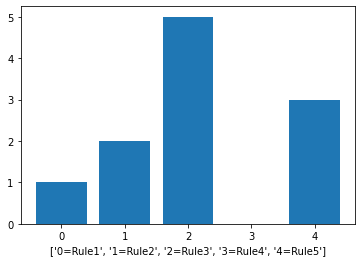

In [35]:
plt.bar([r1,r2,r3,r4,r5],height=(1,2,3,4,5))
plt.xlabel(['0=Rule1','1=Rule2','2=Rule3','3=Rule4','4=Rule5'])

In [44]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


<AxesSubplot:>

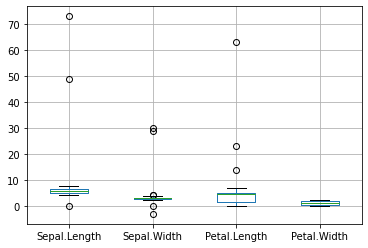

In [20]:
df.boxplot()

In [41]:
df2=df['Sepal.Length'].dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x17a21f5cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a21f6c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a21f5ca30>],
 'medians': [<matplotlib.lines.Line2D at 0x17a21f6cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a21f6cfd0>],
 'means': []}

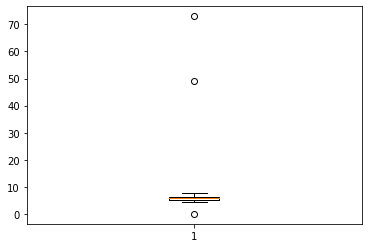

In [42]:
plt.boxplot(df2)